In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")

In [7]:
ev_data = pd.read_csv('../data/ev_data.csv',index_col=0)

In [8]:
ev_data.head()

,manufacturer,model,released,release_month,release_year,useable_battery,acceleration,max_speed,real_range,efficiency,fastcharge,price_germany,price_ned,price_uk
0,Tesla,Model Y Long Range Dual Motor,1,February,2022,75.0,5.0,217,435,172,670.0,59017.0,54993.0,52990.0
1,Tesla,Model Y,1,November,2022,57.5,6.9,217,345,167,580.0,47567.0,47993.0,44990.0
2,Tesla,Model 3,1,December,2021,57.5,6.1,225,380,151,630.0,46667.0,45993.0,42990.0
3,BYD,ATTO 3,1,August,2022,60.0,7.3,160,320,188,300.0,44625.0,42998.0,NaN
4,Tesla,Model 3 Long Range Dual Motor,1,November,2021,75.0,4.4,233,485,155,750.0,56667.0,53993.0,50990.0


In [14]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     298 non-null    object 
 1   model            298 non-null    object 
 2   released         298 non-null    int64  
 3   release_month    298 non-null    object 
 4   release_year     298 non-null    int64  
 5   useable_battery  298 non-null    float64
 6   acceleration     298 non-null    float64
 7   max_speed        298 non-null    int64  
 8   real_range       298 non-null    int64  
 9   efficiency       298 non-null    int64  
 10  fastcharge       295 non-null    float64
 11  price_germany    273 non-null    float64
 12  price_ned        266 non-null    float64
 13  price_uk         187 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 34.9+ KB


In [17]:
ev_data[ev_data.columns[:5]] = ev_data[ev_data.columns[:5]].astype('category')

In [19]:
print(ev_data.describe())

       useable_battery  acceleration   max_speed  real_range  efficiency  \
count       298.000000    298.000000  298.000000  298.000000  298.000000   
mean         70.240604      7.572483  180.305369  357.231544  199.500000   
std          21.269367      3.151556   39.155789  111.933437   32.996403   
min          16.700000      2.100000  125.000000   95.000000  150.000000   
25%          54.000000      4.925000  150.000000  265.000000  174.000000   
50%          71.000000      7.150000  180.000000  365.000000  192.000000   
75%          83.700000      9.000000  200.000000  433.750000  214.000000   
max         123.000000     19.100000  320.000000  685.000000  295.000000   

        fastcharge  price_germany      price_ned       price_uk  
count   295.000000     273.000000     266.000000     187.000000  
mean    539.220339   70840.157509   74158.116541   63814.374332  
std     248.706317   41653.597731   44110.217046   37344.357670  
min     150.000000   21940.000000   21750.000000   

In [29]:
categ_cols = ['manufacturer','released','release_month','release_year']
num_cols = list(ev_data.columns[5:11])
price_cols = list(ev_data.columns[11:])

In [21]:
ev_data['model'] = ev_data['model'].astype(str)

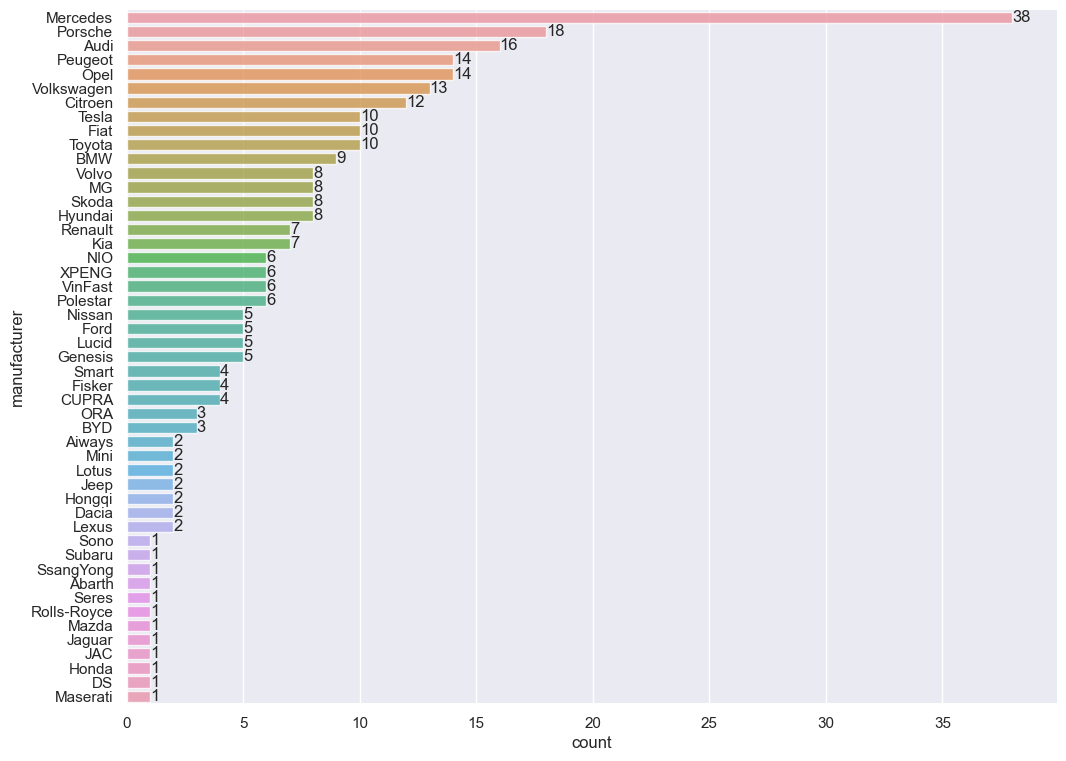

In [23]:
fig, ax = plt.subplots(figsize=(12,9))

# man = ev_data['manufacturer'].value_counts().index
# count = ev_data['manufacturer'].value_counts().values
sns.countplot(y=ev_data['manufacturer'],orient='h',
              order = ev_data['manufacturer'].value_counts().index,
              # palette='dark',
              alpha=0.8)
# plt.xticks(rotation=45);
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0]);

In [24]:
from calendar import month_name
month_lookup = list(month_name)
months = ev_data['release_month'].unique()

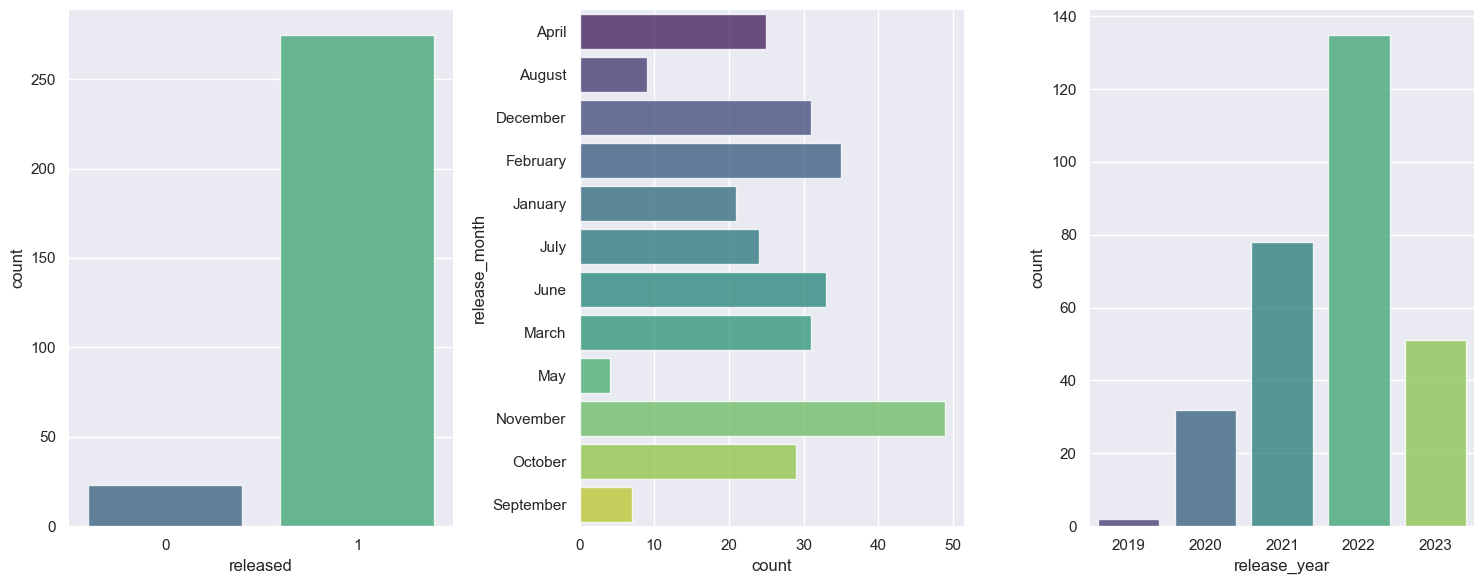

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,6))

sns.countplot(x=ev_data['released'],ax=axes[0],palette='viridis',alpha=0.8)
sns.countplot(y='release_month',data=ev_data,ax=axes[1],palette='viridis',alpha=0.8)
sns.countplot(x='release_year',data=ev_data,ax=axes[2],palette='viridis',alpha=0.8)
sns.despine(left=True, bottom=True)

plt.tight_layout()

taken from [this medium article](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

In [26]:
def heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220,n=n_colors) # Create the palette
    color_min = -1 # Range of values that will be mapped to the palette, i.e. min and max possible correlation
    color_max = 1
                                    
    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s'
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.invert_yaxis()

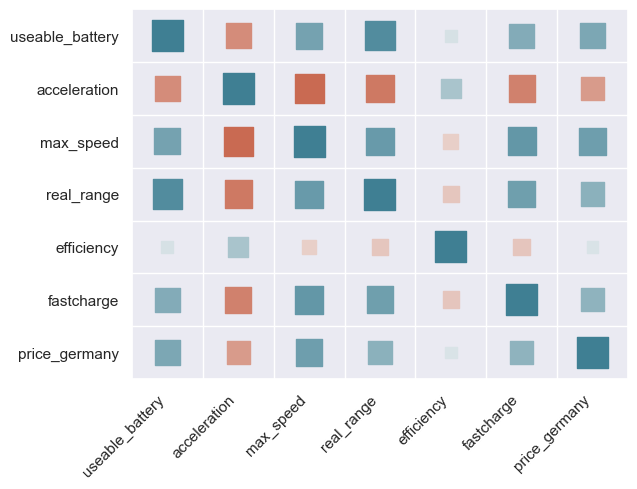

In [30]:
corr = ev_data.corr()
corr = pd.melt(ev_data[num_cols+['price_germany']].corr().reset_index(),id_vars='index')
corr.columns = ['x','y','value']

heatmap(x=corr['x'],y=corr['y'],
        size=corr['value'].abs(),
        color=corr['value'])

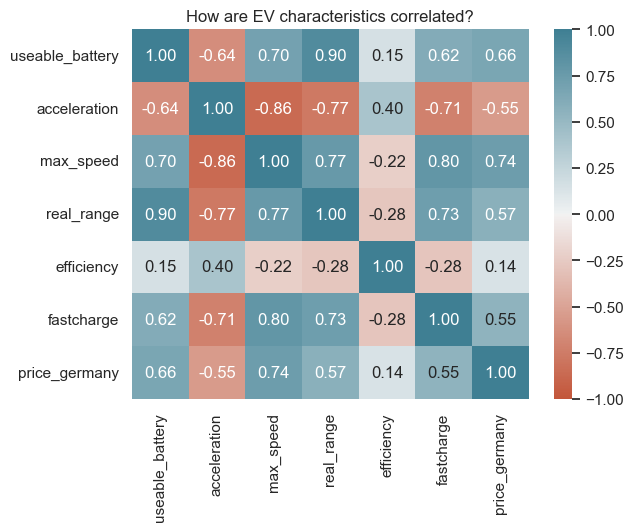

In [671]:
cmap = sns.diverging_palette(20, 220, as_cmap=True)
ax = sns.heatmap(ev_data[num_cols+['price_germany']].corr(),
                 annot=True,
                 fmt=".2f",
                 vmin=-1,
                 cmap = cmap)

ax.set_title('How are EV characteristics correlated?');

Obviously, a lot of factors determine price, and a lot of intercorrelation is seen here. For example, max speed seems to have the highest correlation with price, but max speed itself is - somewhat obviously - correlated with useable battery. 

On the other hand, acceleration seems to be very negatively correlated with price.

What is surprising, however, is that efficiency does not seem to be as positively correlated with price.

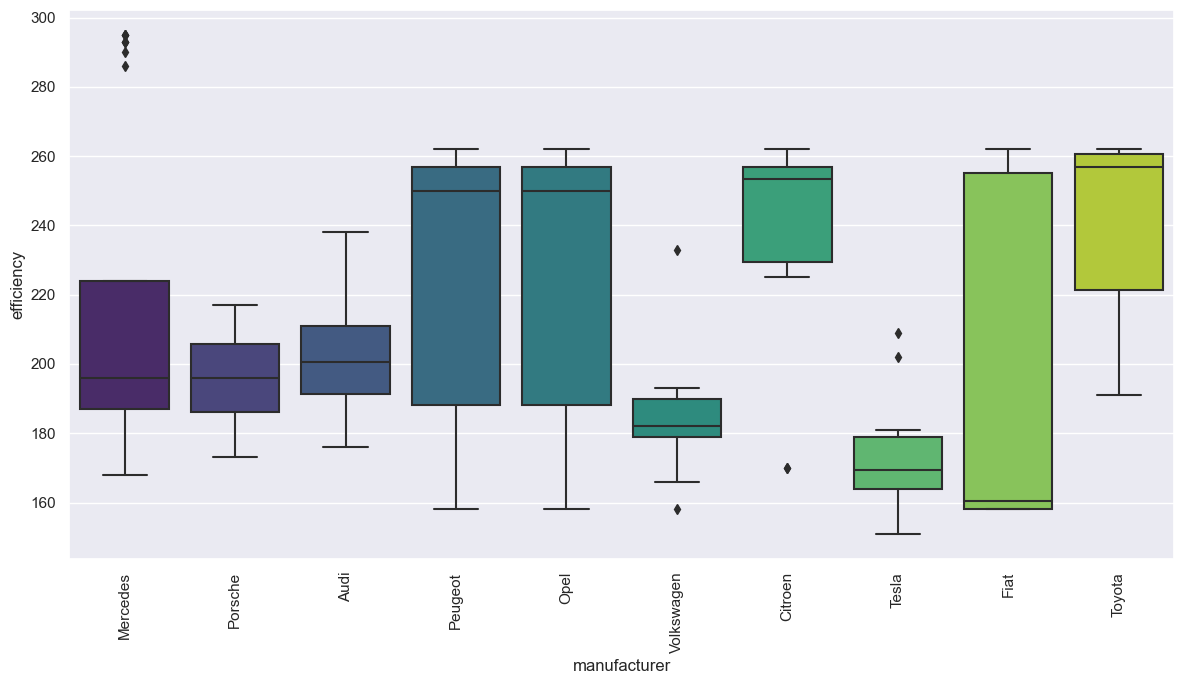

In [31]:
# count the number of occurrences of each manufacturer in the dataframe
manufacturer_counts = ev_data['manufacturer'].value_counts()

# filter the dataframe to include only manufacturers that appear more than 9 times
manufacturer_10_df = ev_data[ev_data['manufacturer'].isin(manufacturer_counts.index[manufacturer_counts > 9])][['manufacturer','efficiency','release_year']]

# create a boxplot of efficiency by manufacturer
fig, ax = plt.subplots(figsize=(12,7))
# sns.boxplot(data=ev_data, x='manufacturer', y='efficiency',hue='release_year',order=manufacturer_counts.index[:10])
sns.boxplot(data=ev_data[ev_data['release_year']!='2023'],x='manufacturer',y='efficiency',order=manufacturer_counts.index[:10],
            palette='viridis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

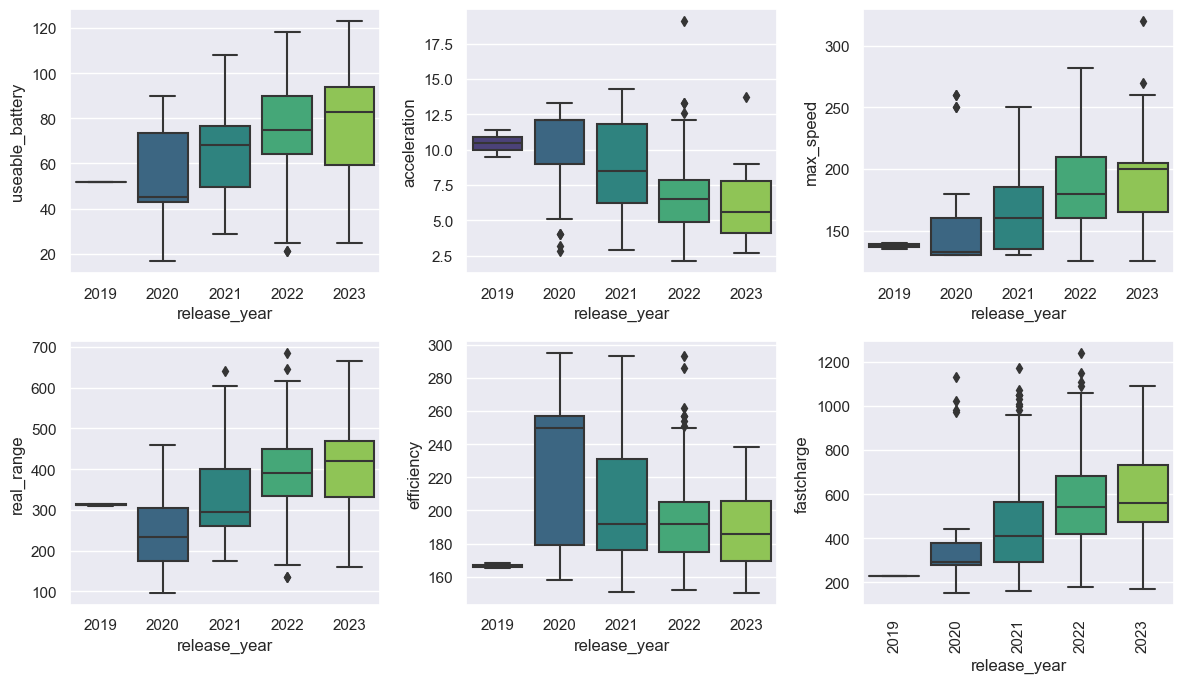

In [38]:
# create a boxplot of efficiency by manufacturer
fig, axes = plt.subplots(figsize=(12,7),nrows=2,ncols=3)
# sns.boxplot(data=ev_data, x='manufacturer', y='efficiency',hue='release_year',order=manufacturer_counts.index[:10])


for col, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(data=ev_data,x='release_year',y=col,
                palette='viridis',ax=ax)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()